# Note 1: Supervised Learning

**基本记号**
- $(x^{(i)}, y^{(i)})$表示第$i$个训练样本(training example)
- $x^{(i)}$表示第$i$个训练样本的输入变量(input variables), 也称为输入特征(input features)
- $y^{(i)}$表示第$i$个训练样本的输出或目标变量(target variable)

有监督学习的general目标：给定一个训练集，学习一个函数$h: X \rightarrow Y$，使得$h(x)$能够对$y$进行准确预测 (这里也称这个函数$h$为一个假设(hypothesis))

根据被预测变量的连续/离散与否，可以将监督学习分为*回归(regression)* 和 *分类(classification)* 两种情况。

## 1. Linear Regression

### 基本模型



$$ h(x) = \sum_{i=0}^n \theta_i x_i = \theta^T x $$

其中称$\theta$为参数; 特别地, $\theta_0$称为截距项(intercept term) (其对应的$x$为1).

### OLS的Cost Function



$$J(\theta) = \frac{1}{2}\sum_{i=1}^{n}(h_{\theta}(x^{(i)})-y^{(i)})^2$$

### 优化算法

##### 梯度下降法 Gradient Descent

##### Gradient Descent 的一般形式

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

其中$j=1,2,...,p$，也就是同步更新所有的特征

##### 对于OLS case

对损失函数关于某个特征求偏导有：

$$ \begin{aligned} \frac{\partial}{\partial \theta_{j}} J(\theta) &=\frac{\partial}{\partial \theta_{j}} \frac{1}{2}\left(h_{\theta}(x)-y\right)^{2} \\ &=2 \cdot \frac{1}{2}\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(h_{\theta}(x)-y\right) \\ &=\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(\sum_{i=0}^{n} \theta_{i} x_{i}-y\right) \\ &=\left(h_{\theta}(x)-y\right) \cdot x_{j} \end{aligned} $$

因此对于一个样本$i (i=1,2,...,n)$的每个特征$(j =1,2,...,q)$，梯度下降的更新公式为：

$$ \theta_{j}:=\theta_{j}+\alpha\left(y^{(i)}-h_{\theta}(x^{(i)})\right) \cdot x_{j}^{(i)} $$

这一更新公式是符合 *最小均方误(MSE)* 的，因此也成为LMS(least mean square)更新规则，或Widrow-Hoff规则。

##### Batch Gradient Descent 批量梯度下降法

算法描述：

>Repeat until convergence {
>$$ \theta := \theta + \alpha \sum_{i=1}^n (y^{(i)} -  h_\theta(x^{(i)}) )x^{(i)} $$
>}





批量梯度下降法每次迭代都要用到所有的训练样本，所以当训练集很大时，会很慢。

##### Stochastic Gradient Descent 随机梯度下降法

算法描述:
> Loop{
> 
>  for i = 1 to n {
> 
> $$ \theta := \theta + \alpha(y^{(i)} - h_\theta(x^{(i)}))x^{(i)} $$
>       
>    }
> 
> }

随机梯度下降法每次只用一个样本来更新参数，而不是用所有的样本.

### 关于OLS的数学补充

#### 矩阵求导

定义:

$$ \nabla_A f(A) = \begin{bmatrix} \frac{\partial f}{\partial A_{11}} & \frac{\partial f}{\partial A_{12}} & \cdots & \frac{\partial f}{\partial A_{1n}} \\ \frac{\partial f}{\partial A_{21}} & \frac{\partial f}{\partial A_{22}} & \cdots & \frac{\partial f}{\partial A_{2n}} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial f}{\partial A_{m1}} & \frac{\partial f}{\partial A_{m2}} & \cdots & \frac{\partial f}{\partial A_{mn}} \end{bmatrix} $$

例如:

若$f(A) = \frac23 A_{11} + 5A_{12}^2 + A_{21}A_{22}$, 则

$$ \nabla_A f(A) = \begin{bmatrix} \frac23 & 10A_{12} \\A_{22} &A_{21} \end{bmatrix} $$

*统计学讨论部分略*

### Locally Weighted Linear Regression 局部线性回归

希望在设计回归方程时, 若考虑当前某点的作用, 希望距离该点临近的点提供更大的信息权重, 距离该点较远的点提供较小的信息权重.

#### 欠拟合与过拟合

- underfitting
- overfitting

#### LWR的损失函数

$$ J(\theta) = \sum_i \omega^{(i)}(y^{(i)} - \theta^T x^{(i)})^2 $$

$\omega^{(i)} $ 是人为设计的一个参数, 其中一种比较成熟的设计为(高斯核):

$$ \omega^{(i)} = \exp \left( - \frac{ (x^{(i)} - x) ^2}{2 \tau^2} \right) $$

其中称$\tau $为带宽, 用来控制$\omega^{(i)} $的衰减速度. $\tau $越大, $\omega^{(i)} $衰减越慢, $\tau $越小, $\omega^{(i)} $衰减越快.

若用矩阵形式表达,则为:

$$ J(\theta) = (y - X\theta)^T W (y-X\theta)$$

$$\theta = (X^{T}WX)^{-1}X^{T}Wy$$


#### LWR的python实现

记: 数据样本量为m

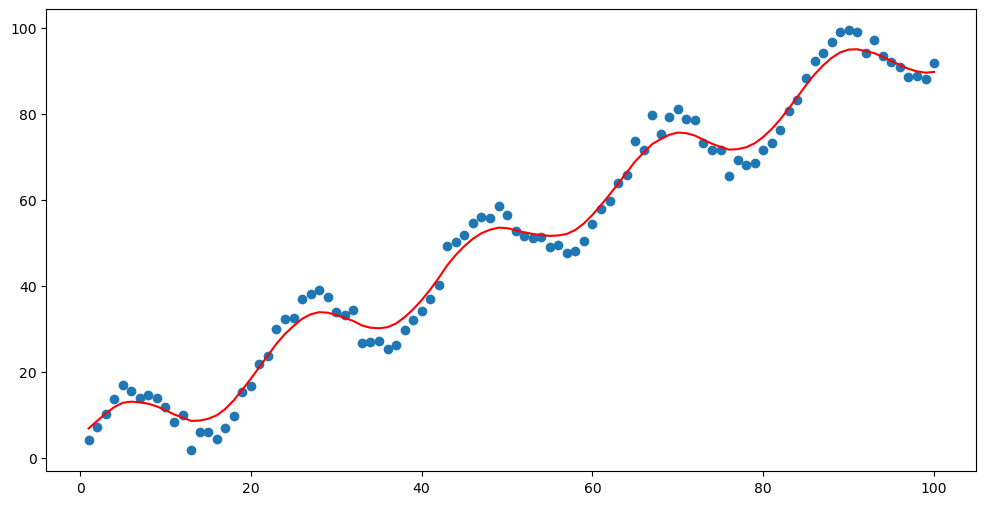

In [5]:
#coding = utf-8
import numpy as np
import scipy.stats as stats
from math import *
import matplotlib.pyplot as plt

def getw(x0,x,k):
    '''
    :param x0: 1*m 是当前样本点
    :param x: n*m 是整个样本集
    :param k: 高斯核的带宽,也就是\tau
    :return: w: n*n
    '''
    w = np.zeros([m,m]) # 初始化, m是样本数
    for i in range(m):
        # w[i,i] = exp((x1[i,1] - x0)**2/(-2*k*k))
        w[i, i] = exp((np.linalg.norm(x0 - x[i])) / (-2 * k ** 2))
    return w

def getyvalue(x1,x,y,k):
    '''
    :param x1: n*2 是
    :param x: m*2 是
    :param y: m*1
    :param k: 高斯核的带宽,也就是\tau

    '''
    y_value = np.zeros(m)
    #w = np.matrix(np.zeros((m, m)))
    w = np.zeros([m,m])

    for i in range(m):
        w = getw(x[i],x, k)
        theta = np.linalg.inv(x1.T.dot(w).dot(x1)).dot(x1.T).dot(w).dot(y)
        y_value[i] = theta[0] + theta[1] * x[i]
    return y_value

if __name__ == "__main__":
    x = np.arange(1, 101)
    x = np.array([float(i) for i in x])
    y = x + [10 * sin(0.3 * i) for i in x] + stats.norm.rvs(size=100, loc=0, scale=1.5)
    #plt.figure(figsize=(12, 6))
    #plt.scatter(x, y)
    #plt.show()

    x = x.reshape(-1, 1)
    x1 = np.c_[np.ones((100, 1)), x]
    y = y.reshape(-1, 1)
    m = len(x)

    y_lwlr = np.zeros(m)
    y_lwlr = getyvalue(x1,x,y,k=1.2)
    plt.figure(figsize=(12,6))
    plt.scatter(x, y)
    plt.plot(x, y_lwlr, 'r')
    plt.show()

说明:

- 注意看, 在上面的代码实现中,并没有使用循环迭代收敛求解,而是通过类似于统计学的方法推导出LWLR的解析解, 直接通过矩阵计算完成的(代码中的循环都是为了生成矩阵元素等)
- 如果说的话, 全部的计算流程和典型的$(X^TX)^{-1}X^TY$是别无二致的,只不过相比之下多了几个关于$X$的运算
- 这个运算相当于每次提取一个样本, 和全部样本集合进行一个矩阵运算,再通过Gauss核得到一个权重, 记为权重矩阵的一个元素, 以此类推得到整个权重.

#### Parametric & Non-para. Algorithm

- parametric: 参数数量固定有限，一旦完成训练集的训练，就可以将训练集丢弃，不再需要原始训练数据；
- non- parametric：参数是不定的，随着训练集的增加，参数数量也会增加，因此训练集不能丢弃，需要保存原始训练数据。


## 2. Classification

### Logistics 分类算法

首先考虑二元分类问题：

沿用之前的记号，我们希望通过对一系列特征$x$的线性组合的某种函数形式$h_{\theta}(x)$来预测$y$，在0-1分类问题中，有：

$$ h_\theta(x) = g(\theta^T x)$$

其中，记$x_0=1$，故$\theta^T x= \sum_{i=0}^n \theta_i x_i$

这里的 $g(z)$ 是一个将输出归一化到0～1区间的函数，称为logistics函数。其中一个比较常用的函数是sigmoid函数：

$$ g(\theta^T x) := \text{sigmoid} (\theta^T x) = \frac{1}{1+e^{-\theta^T x}}$$

特别指出，sigmoid函数的导数形式具有较好的性质 (具体求导展开即证）：

$$ \text{sigmoid}'(z) = \text{sigmoid}(z)(1-\text{sigmoid}(z))$$
  

#### 参数求解：极大似然

由于$y$是一个0-1变量，而$h_{\theta}$是0～1区间的一个连续取值，因此可以将$h_{\theta}$看成是$y=1$的概率，而$1-h_{\theta}$是$y=0$的概率，即：

$$p(y|x;\theta) = (h_{\theta}(x))^y(1-h_{\theta}(x))^{1-y} ~ (y=0 \text{ or } 1)$$


上面是针对一个样本例子而言的。若进一步考虑所有的样本，假设样本之间是独立同分布的，那么似然函数为（假设样本容量为$n$）：

$$ \begin{align*} L(\theta) &= \prod_{i=1}^n p(y^{(i)}|x^{(i)};\theta) \end{align*} $$

进一步得到对数似然：

$$ \begin{align*} l(\theta) &= \log L(\theta) \\ &= \sum_{i=1}^n \log p(y^{(i)}|x^{(i)};\theta) \\ &= \sum _{i=1}^n y^{(i)}\log h_\theta(x^{(i)}) + (1-y^{(i)})\log (1-h_\theta(x^{(i)})) \end{align*} $$

##### 梯度下降法优化求解

在这里的极大值优化场景下，GD为：

$$ \theta := \theta + \alpha \nabla_\theta l(\theta) $$

因此得到SGD优化过程：

$$ \theta_j : = \theta_j + \alpha (y^{(i)} - h_\theta(x^{(i)}))x^{(i)}_j $$

若与OLS的SGD比较，会发现二者的公式完全相同。唯一变化的是这里的$h_\theta(x^{(i)})$，即预测值是经过非线性的sigmoid函数映射的，而OLS中的$h_\theta(x^{(i)})$为$\theta^Tx^{(i)}$。

这也揭示二者都属于同一类算法，即线性回归和逻辑回归都属于广义线性模型（GLM）。


### Newton 优化算法

Newton法本身是用来求解函数的零点用的，其具体的形式为：

$$ \theta := \theta - \frac{f(\theta)}{f'(\theta)} $$

![](https://michael-1313341240.cos.ap-shanghai.myqcloud.com/202308081358536.png)

在优化算法中，其本质原理在于 *目标函数的极值点（可能）出现在函数的导数为0的点*，因此我们借用Newton算法寻找导函数的零点。在这种情况下的优化算法具体为：

$$ \theta := \theta - \frac{l'(\theta)}{l''(\theta)} $$

更进一步，推广到$\theta$为向量的情况则有：

$$ \theta:= \theta - H^{-1}\nabla_\theta l(\theta) $$

其中$H$为Hessian矩阵，表示二阶导数矩阵：

$$H_{ij} = \frac{\partial^2 l(\theta)}{\partial \theta_i \partial \theta_j}$$

牛顿法的收敛速度更快，但由于要计算一个Hessian矩阵，所以计算量更大。

这里通过牛顿法求解对数似然函数最大值的方法也称为*Fisher scoring method*。

### 补充：一种（过时的）分类算法 - Perceptron

在处理0-1分类问题中，perceptron规定logistics函数$g$为：

$$ g(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{if } z<0 \end{cases} $$

因此以此可以得到$h_\theta(x)  =g(\theta^T x)$及其更新函数：

$$ \theta_j := \theta_j + \alpha(y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)} $$

目前为止，分类问题有两种思路：
- 以logistic regression为代表：通过数据学习概率$p(y|x)$
- 以perceptron 为代表：通过数据直接学习从数据特征$\mathcal{X}$的空间到标签$y\in\{-1,1\}$的映射

## 3. Generalized Linear Models

**引入**

回忆上文，对于ols和logistics，我们分别假设：
- ols：$y|X;\theta \sim N(\mu, \sigma^2)$ (其中$\mu = X\theta$)
- logistics：$y|X;\theta \sim Bernoulli(\phi)$ (其中$\phi = \frac{1}{1+e^{-X\theta}}$)
  
事实上，这两种模型假设都可以得以统一，得到更加通用的GLM模型。

### Exponential Family 指数分布族

给出exponential family distributions 的定义：
$$ p(y;\eta) = b(y) \exp(\eta^T T(y) - a(\eta)) $$
其中：
- $\eta$ 是 natural parameter 或者 canonical parameter，是决定分布的一个参数
- $T(y)$ 是标签$y$的一个充分统计量(sufficient statistic)，有时会取$T(y) = y$
- $a(\eta)$ 是 log partition function，是一个归一化因子，使得指数分布族中的分布pdf积分为1

当固定$T$的选择后，不同的$a,b$就会确定不同的分布族，这些分布族都是指数分布族，其分布的参数由$\eta$决定。

事实上，诸如*Gaussian, Bernoulli, Binomial, Poisson, Exponential, Gamma, Beta, Dirichlet*等分布都是指数分布族的一种。

#### Bernoulli 分布与指数分布族

已知Bournoulli Distribution：
$$\begin{align*} p(y;\phi) &= \phi^y(1-\phi)^{1-y} \\&= \exp(y\log\phi + (1-y)\log(1-\phi)) \\ &= \exp[(\log\frac{\phi}{1-\phi})y + \log(1-\phi) ] \end{align*}$$



参照GLM的定义，可以发现Bernoulli的分布是令GLM中：
- $T(y) = y$
- $\eta = \log(\frac{\phi}{1-\phi})$  *(有趣的是，其等价于$\phi = \frac{1}{1+e^{-\eta}}$，即为logistic function)*
- $a(\eta) = -\log (1-\phi) = \log(1 + e^{\eta})$
- $b(y) = 1$

#### 正态分布与指数分布族

不失一般性，令正态分布的$\sigma^2=1$（因正态分布假定的标准差不会影响参数的取值），则有：
$$\begin{align} p(y;\mu)  &= \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}(y-\mu)^2\right) \\ &= \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}y^2\right)\exp\left(\mu y-\frac{1}{2}\mu^2\right) \end{align}$$

对比GLM的定义，可以发现：
- $\eta = \mu $
- $T(y) = y$
- $a(\eta) = \mu^2/2 = \eta^2/2$
- $b(y) = (1/\sqrt{2\pi}\exp(-y^2/2)$))

### GLM的建模

1. 假定在给定$x$和其线性组合的组合系数$\theta$后，$y$服从以$\eta$为参数的指数分布族分布，即：$y|x;\theta \sim \text{Exponential Family}(\eta)$
2. 建模的目的是：当给定数据$x$，找到一个合理的假设$h(x)$来较好的预测$T(y)$（常令$T(y)=y$），即：$h(x)=\mathbb{E}[T(y)|x]$
3. $\eta$和$x$之间的关系为：$\eta = \theta^T x$

### Softmax Regression

**考虑如下多分类问题：**

- 假设$y$可能有$k$种可能的分类结果，即$y\in\{1,2,...,k\}$。

- 为了避免虚拟变量陷阱问题，我们可以用$k-1$个参数 $\phi_1, \phi_2, ..., \phi_{k-1}$ 来描述$y$于第$i$类的概率，即$\phi_i = p(y=i;\phi)$ (我们可以进一步推知$\phi_k=1-\sum_{i=1}^{k-1}\phi_i ~ (\ast)$)

**这里想要同样将这个多分类问题整理为一个GLM问题，因此参考GLM定义进行如下的转换：**

- 将$y$映射成一个$k-1$维的向量 $T(y) \in \R^{k-1}$，具体而言：
    $$T(1) = \begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix}, T(2) = \begin{bmatrix} 0 \\ 1 \\ \vdots \\ 0 \end{bmatrix}, ..., T(k-1) = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 1 \end{bmatrix} ,T(k) = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}$$

- 为说话方便，记$T(y)_i$为$y$的第$i$个分量；此外引入示性函数$\mathit{1}(\cdot)$.


- 则我们的优化目标即为尽可能的预测$T(y)$的每一个分量（预测结果尽可能接近每个分量的期望），即：
    $$ E[T(y)_i ] = P(y=i) = \phi_i$$

**下说明 *Multinomial Distribution 也是 exponential fanmilily的一种 :***

$$ \begin{align*}
p(y;\phi) &= \phi_1^{\mathit{1}(y=1)} \phi_2^{\mathit{1}(y=2)} \cdots \phi_k^{\mathit{1}(y=k)} \\ &= \phi_1^{\mathit{1}(y=1)} \phi_2^{\mathit{1}(y=2)} \cdots \phi_k^{1-\sum_{i=1}^{k-1}\mathit{1}(y=i)} \textit{  (by *)} \\ &= \phi_1^{T(y)_1} \phi_2^{T(y)_2} \cdots \phi_k^{T(y)_k} \textit{  (by def of T())}  \\& \equiv \exp [T(y)_1\log(\phi_1) + T(y)_2\log(\phi_2) + \cdots + (1-\sum_{i=1}^{k-1}T(y)_i)\log(\phi_k)] \\&\equiv \exp[ T(y)_1\log(\phi_1/\phi_k) + T(y)_2\log(\phi_2/\phi_k) + \cdots + T(y)_{k-1}\log(\phi_{k-1}/\phi_k) + \log(\phi_k) ] \\& := b(y) \exp[\eta^T T(y) - a(\eta)] \\ \textit{Q.E.D.}\end{align*} $$

其中：
- $\eta = [\log(\phi_1/\phi_k), \log(\phi_2/\phi_k), \cdots, \log(\phi_{k-1}/\phi_k)]^T$
- $a(\eta) = -\log(\phi_k)$
- $b(y) = 1$

**由GLM推导*Softmax Function*：**

在上面的证明中，我们得到的多分类问题对应的GLM参数为：
$$\eta_i = \log\frac{\phi_i}{\phi_k}$$
为方便起见，人为定义$\eta_k = \log(\phi_k/\phi_k) = 0$作为初始条件；且结合$\phi$的定义得到等式 $\sum_{i=1}^k\phi_i = 1$，最终将上述递归式子整理成：
$$\phi_i = \frac{\exp(\eta_i)}{\sum_{j=1}^k\exp(\eta_j)}$$

*这就是大名鼎鼎的 Softmax Function！*

**通过GLM的建模策略完成*Softmax Regression***


延续上面的推导，我们有：

$$
\begin{aligned}
h_\theta(x) & =\mathrm{E}[T(y) \mid x ; \theta] \\
& =\mathrm{E}\left[\begin{array}{c}
1\{y=1\} \\
1\{y=2\} \\
\vdots \\
1\{y=k-1\}
\end{array}\right] \textit{(Given x;}\theta\textit{)} \\
& =\left[\begin{array}{c}
\phi_1 \\
\phi_2 \\
\vdots \\
\phi_{k-1}
\end{array}\right]\\
&=  {\left[\begin{array}{c}
\frac{\exp \left(\theta_1^T x\right)}{\sum_{j=1}^k \exp \left(\theta_j^T x\right)} \\
\frac{\exp \left(\theta_2^T x\right)}{\sum_{j=1}^k \exp \left(\theta_j^T x\right)} \\
\vdots \\
\frac{\exp \left(\theta_{k-1}^T x\right)}{\sum_{j=1}^k \exp \left(\theta_j^T x\right)}
\end{array}\right] . }
\end{aligned}
$$


事实上，这里的预测值就是给出了（对于一次实验，或对于一个样本观测可能的结果$y$，其属于）$k-1$个类别的可能发生的概率。因此，我们可以将这个模型看作是一个概率模型，就可以同样使用*MLE*来求解参数$\theta$。

假设共有$n$个训练数据$ \left\{ \left(x^{(i)}, y^{(i)}\right) \right\}_{i=1}^n $，通过计算，最终得到的对数似然函数为：
$$
\begin{aligned}
\ell(\theta) & =\sum_{i=1}^n \log p\left(y^{(i)} \mid x^{(i)} ; \theta\right) \\
& =\sum_{i=1}^n \log \prod_{l=1}^k\left(\frac{e^{\theta_l^T x^{(i)}}}{\sum_{j=1}^k e^{\theta_j^T x^{(i)}}}\right)^{1\left\{y^{(i)}=l\right\}}
\end{aligned}
$$

通过相似的优化算法即可完成最后的求解。